# 01-01. 都道府県別の1日ごとの感染者数・死者数

下記で公開されているデータを利用し、可視化を試みる。

タイトル|Link|説明
-----|--------|--------|
NHK 特設サイト 新型コロナ データ一覧 |<a href="https://www3.nhk.or.jp/news/special/coronavirus/data-widget/">https://www3.nhk.or.jp/news/special/coronavirus/data-widget/</a>| NHKによるまとめ　新型コロナウイルス関連データ・ダウンロードサービス|

**データ出典：「新型コロナ関連の情報提供:NHK等」**

本コンテンツでは、その中でも「都道府県ごとの感染状況」データに着目し、ダウンロードすることを前提にグラフ化している。

参考までに、データの配置は本ファイルと同じフォルダ内に、

```yyyymmdd フォルダ```

を作成し、その中に 

```nhk_news_covid19_prefectures_daily_data.csv```

のようにCSVファイルが置かれていることを想定している。グラフ画像は同フォルダに出力される。

In [56]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [57]:
# matplotlib の設定を調整   
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 16 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 16

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
#pd.options.display.float_format = '{:.2f}'.format

In [58]:
#date
current_path = os.getcwd()
getting_data_date = '20210622'

fig01_filename = '01_Number_of_infected_persons_per_day_by_pref_{}'.format(getting_data_date)
fig02_filename = '02_Number_of_deaths_per_day_by_pref_{}'.format(getting_data_date)
fig03_filename = '03_Cumulative_number_of_infected_persons_per_day_by_pref_{}'.format(getting_data_date)
fig04_filename = '04_Cumulative_number_of_deaths_per_day_by_pref_{}'.format(getting_data_date)

fig01_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig01_filename])
fig02_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig02_filename])
fig03_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig03_filename])
fig04_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig04_filename])

fig01_title = 'Number of infected persons per day by pref : {}'.format(getting_data_date)
fig02_title = 'Number of deaths per day by pref : {}'.format(getting_data_date)
fig03_title = 'Cumulative number of infected persons per day by pref : {}'.format(getting_data_date)
fig04_title = 'Cumulative number of deaths per day by pref : {}'.format(getting_data_date)



In [59]:
# Acquire Data
csv_01_file = os.path.sep.join(['', '{}'.format(getting_data_date), 'nhk_news_covid19_prefectures_daily_data.csv'])
data = pd.read_csv(current_path + csv_01_file)

In [60]:
data

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
0,2020/1/16,1,北海道,0,0,0,0
1,2020/1/17,1,北海道,0,0,0,0
2,2020/1/18,1,北海道,0,0,0,0
3,2020/1/19,1,北海道,0,0,0,0
4,2020/1/20,1,北海道,0,0,0,0
...,...,...,...,...,...,...,...
24576,2021/6/17,47,沖縄県,97,19857,4,167
24577,2021/6/18,47,沖縄県,86,19943,0,167
24578,2021/6/19,47,沖縄県,97,20040,0,167
24579,2021/6/20,47,沖縄県,61,20101,0,167


In [61]:
# 日付データをdatetime64変換
data['日付'] = pd.to_datetime(data['日付'])
data

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
0,2020-01-16,1,北海道,0,0,0,0
1,2020-01-17,1,北海道,0,0,0,0
2,2020-01-18,1,北海道,0,0,0,0
3,2020-01-19,1,北海道,0,0,0,0
4,2020-01-20,1,北海道,0,0,0,0
...,...,...,...,...,...,...,...
24576,2021-06-17,47,沖縄県,97,19857,4,167
24577,2021-06-18,47,沖縄県,86,19943,0,167
24578,2021-06-19,47,沖縄県,97,20040,0,167
24579,2021-06-20,47,沖縄県,61,20101,0,167


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24581 entries, 0 to 24580
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                24581 non-null  datetime64[ns]
 1   都道府県コード           24581 non-null  int64         
 2   都道府県名             24581 non-null  object        
 3   各地の感染者数_1日ごとの発表数  24581 non-null  int64         
 4   各地の感染者数_累計        24581 non-null  int64         
 5   各地の死者数_1日ごとの発表数   24581 non-null  int64         
 6   各地の死者数_累計         24581 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.3+ MB


In [63]:
type(data.loc[0, '日付'])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
data.describe()

,都道府県コード,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
count,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000
mean,24.000000,31.848297,4330.099020,0.588096,77.622879
std,13.564936,101.490330,13863.809999,2.329163,228.594999
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,61.000000,0.000000,0.000000
50%,24.000000,3.000000,430.000000,0.000000,8.000000
75%,36.000000,19.000000,2283.000000,0.000000,46.000000
max,47.000000,2520.000000,169321.000000,129.000000,2605.000000


In [65]:
data["都道府県名"].unique()

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

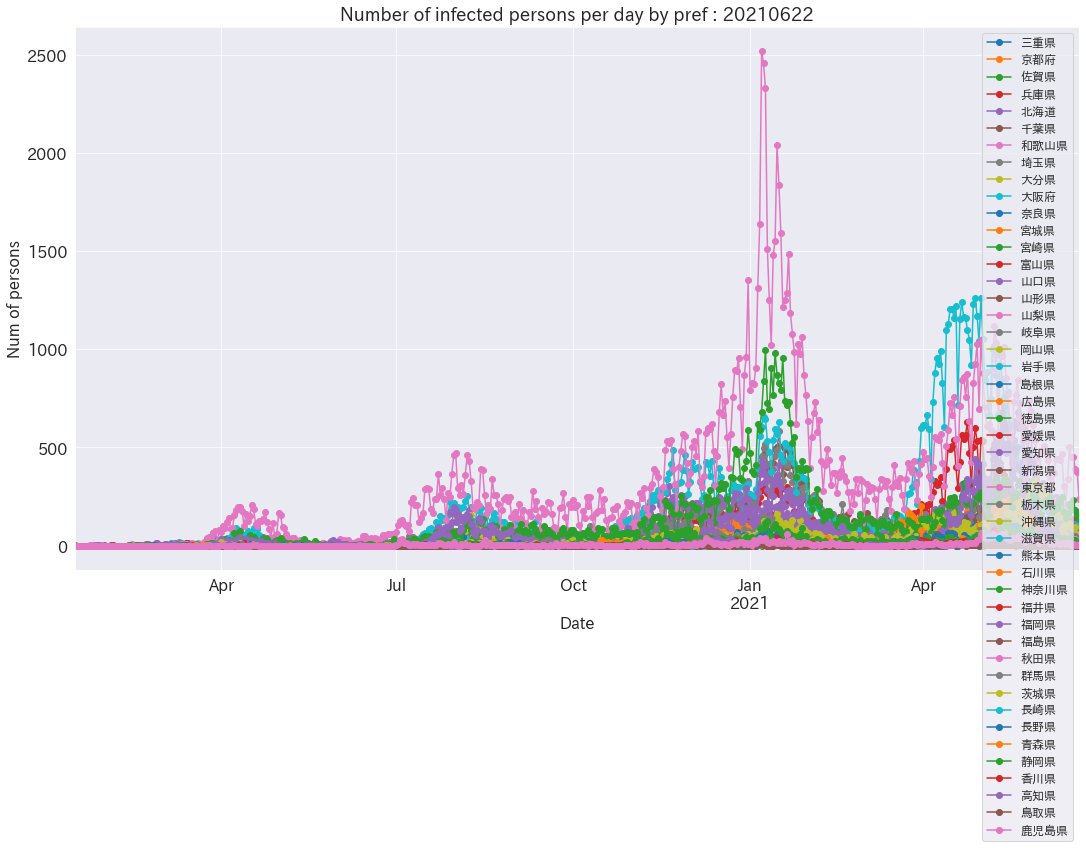

In [66]:
data.index = data['日付']
data.groupby("都道府県名")["各地の感染者数_1日ごとの発表数"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig01_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()
plt.savefig(fig01_filePath, dpi=200)
plt.show()

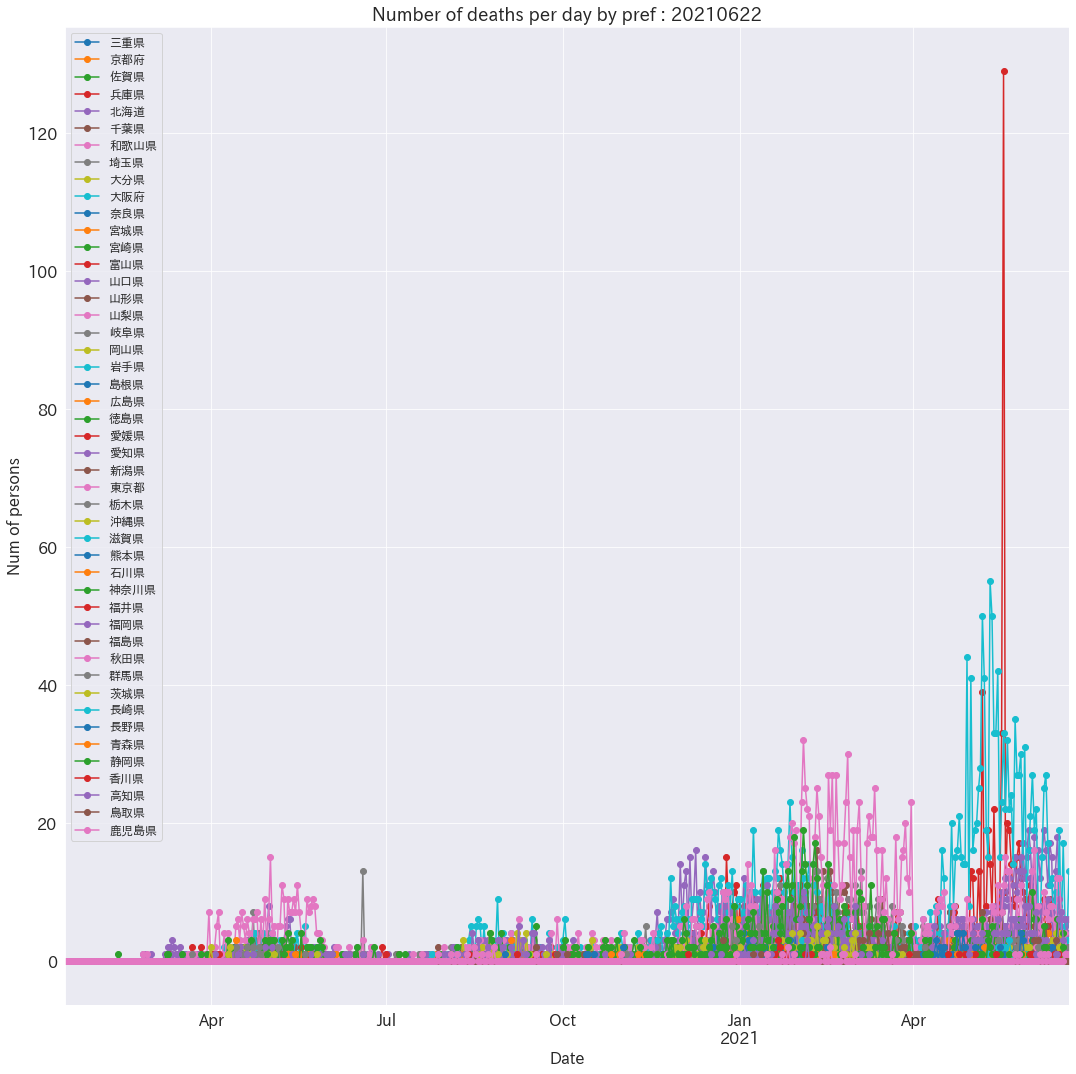

In [67]:
data.index = data['日付']
data.groupby("都道府県名")["各地の死者数_1日ごとの発表数"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig02_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig02_filePath, dpi=200)
plt.show()

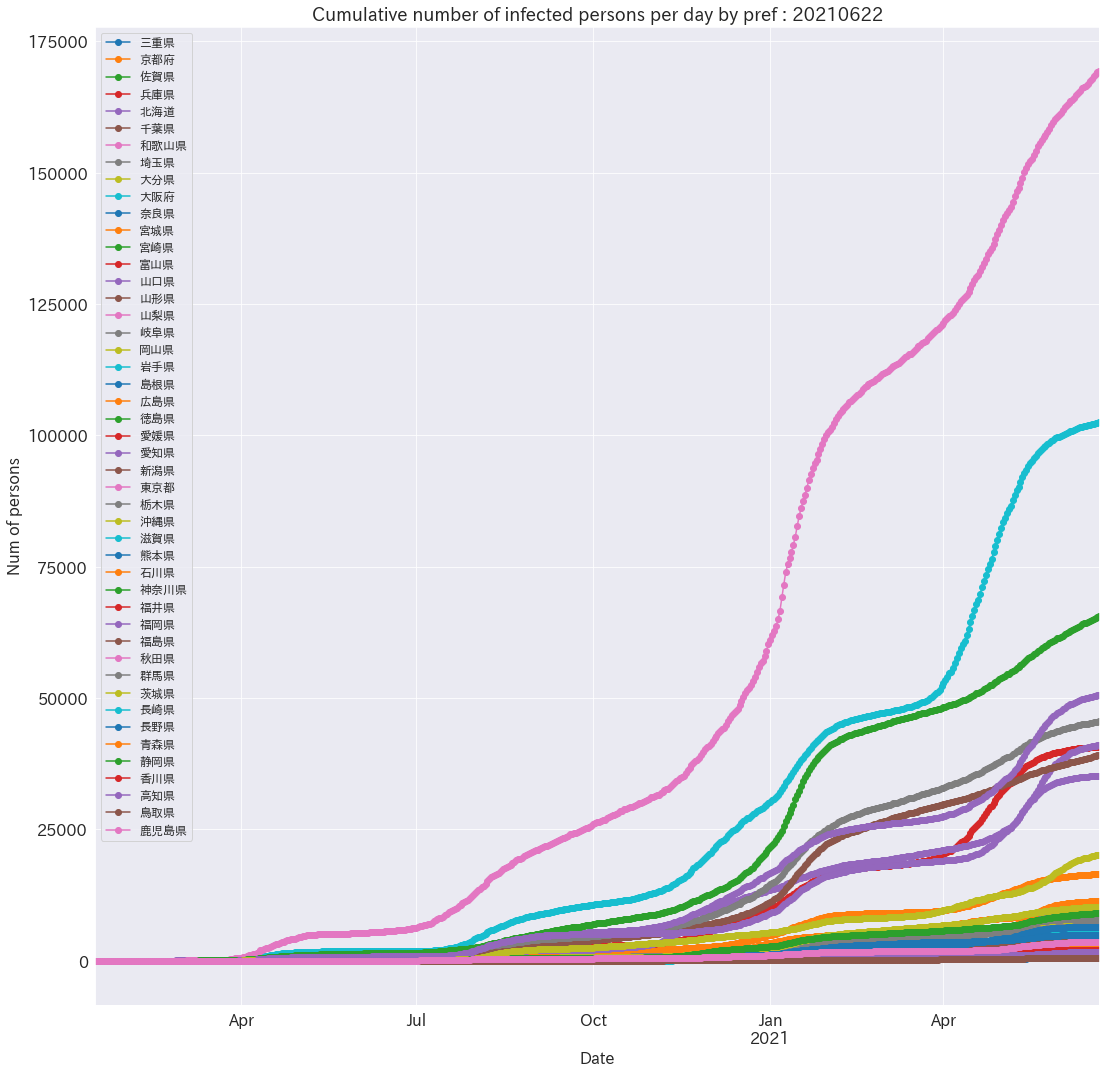

In [68]:
data.index = data['日付']
data.groupby("都道府県名")["各地の感染者数_累計"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig03_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig03_filePath, dpi=200)
plt.show()

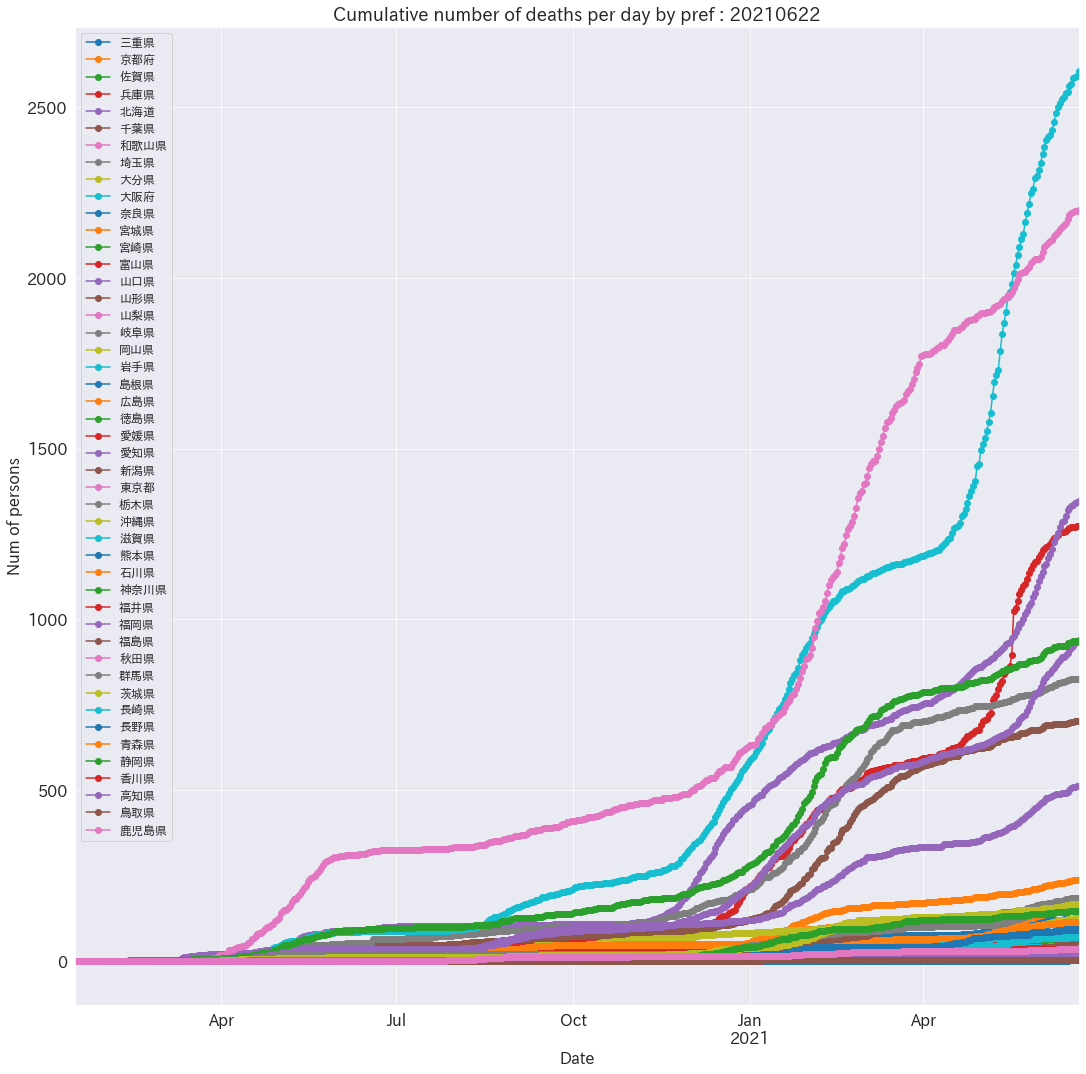

In [69]:
data.index = data['日付']
data.groupby("都道府県名")["各地の死者数_累計"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig04_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig04_filePath, dpi=200)
plt.show()